# What To Consider when Investing in P2P Prosper Loan
## by Abdulmalek Alsaati

## Investigation Overview

P2P lending platform industry is thriving in recent years. Thousands of investors are making profit through these platforms, in this Analysis we will invistigate what should to consider when investing in this Platform.

## Dataset Overview

Here I will explore Prosper data set and try to find out some patterns behind borrowers properties, the dataset which we will analysis contains 81 variables and 113,979 observation for each loan list data during 2005 to 2014.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv("prosperLoanData.csv")


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Estimated Return Figure.

looking at the estimated reutrn for P2P investment, most of the loans have an estimated return between 4% and 20%, and there is peak point at 8% and 12%, if we zoom estimated Loss, we can see there is some distribution between -17% to 1%, top loss frequency is -2.5% and -5%.

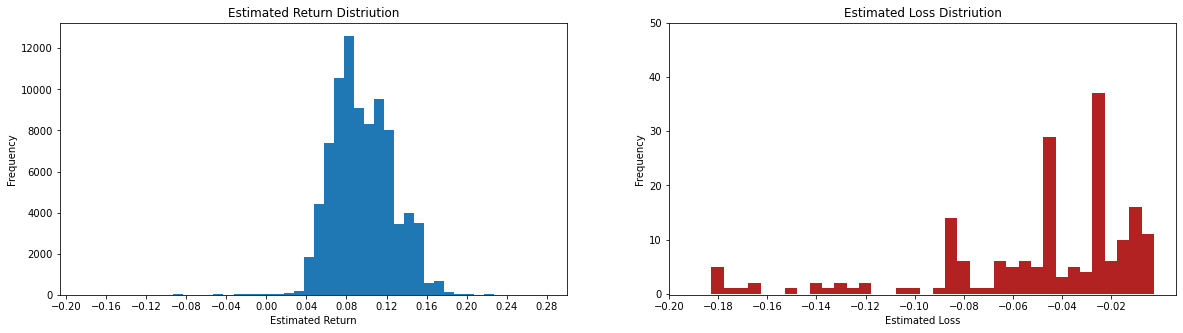

In [23]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 

base_color = sb.color_palette()[0]
bins = np.arange(loan_df.EstimatedReturn.min(), loan_df.EstimatedReturn.max(),0.01)
plt.hist(data=loan_df, x='EstimatedReturn', bins=bins)
plt.xlabel("Estimated Return")
plt.ylabel("Frequency");
plt.xticks(np.arange(-0.2,0.3,0.04));
plt.title("Estimated Return Distriution")

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
bins = np.arange(loan_df.EstimatedReturn.min(), 0 ,0.005)
plt.hist(data=loan_df, x='EstimatedReturn', bins=bins, color='firebrick')
plt.xlabel("Estimated Loss")
plt.ylabel("Frequency");
plt.xticks(np.arange(-0.2,0,0.02))
plt.ylim(-0.2, 50)
plt.title("Estimated Loss Distriution");

## Employenment Staus.

Employement status should be considerd, as the most completed Borrowing status is for Employeed and Full-time borrowers, we can spot more than 17k completed status for Full-time and 12K for Employeed status.

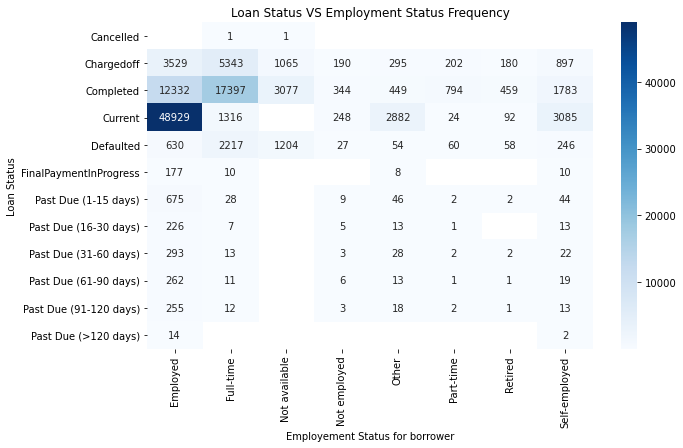

In [24]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
plt.figure(figsize = [10, 6])
ct_counts = loan_df.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')
pvt_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')
#pvt_counts = pvt_counts.reindex(['AA','A', 'B','C','D', 'E','HR'], axis=1)
sb.heatmap(pvt_counts, annot = True, fmt = '.0f', cmap = 'Blues')
plt.title("Loan Status VS Employment Status Frequency")
plt.xlabel("Employement Status for borrower")
plt.ylabel("Loan Status");

## Prosper Rating.

This chart suggests that investing in borrowers with proser Class D and E will produce the highest returns. but this need more exploration as it might combined with higher risk.

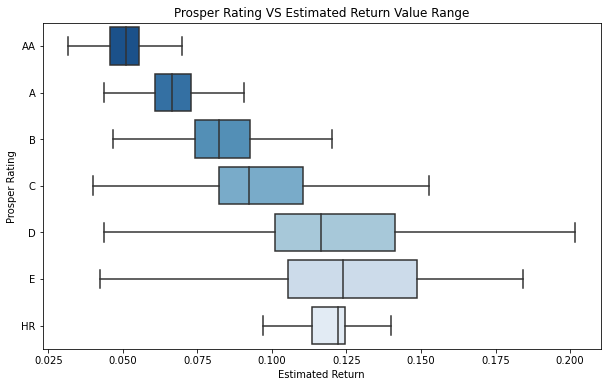

In [25]:
plt.figure(figsize = [10, 6])

sb.boxplot(data = loan_df, y = 'ProsperRating (Alpha)', x = 'EstimatedReturn', palette = "Blues_r", showfliers = False,
          order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.title("Prosper Rating VS Estimated Return Value Range")
plt.xlabel("Estimated Return")
plt.ylabel("Prosper Rating");

## Safe Estimated Return

Finally, from this chart, we can clearly see that each Prosper rating is group with specific return, there is lot of vaiabilities for High risk borrower and there is chance for mony loss. Also this chart suggest a safe range borrower classes which are (AA, A and B), the classes (C and D) are linked to higher return but also linked to small chance of mony losss. In addition this chart suggest borrwing limit for each classes, which to invist more in safe classes, but less in risky classes.

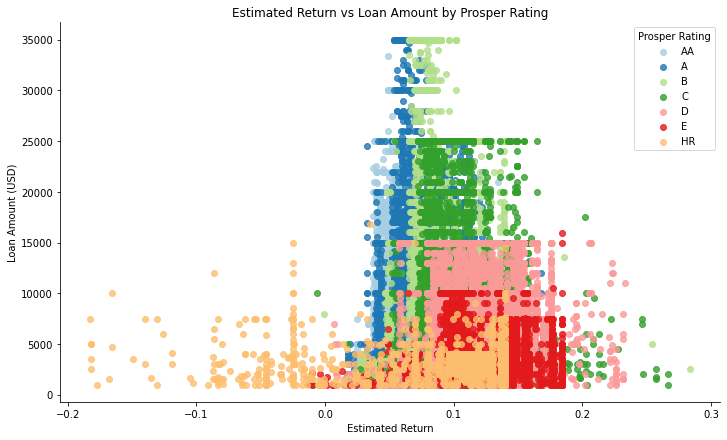

In [26]:
g = sb.FacetGrid(data = loan_df, hue = 'ProsperRating (Alpha)', hue_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'] , 
                 height = 6, aspect = 1.7, palette="Paired")
g.map(sb.regplot,"EstimatedReturn", "LoanOriginalAmount", fit_reg = False);
plt.legend(title="Prosper Rating")
plt.xlabel("Estimated Return")
plt.ylabel("Loan Amount (USD)")
plt.title("Estimated Return vs Loan Amount by Prosper Rating");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!